# Hands on Decision Trees


### 1.) Download the Iris dataset via sklearn and split it into a training and test set.

In [1]:
from sklearn import datasets

iris = datasets.load_iris()

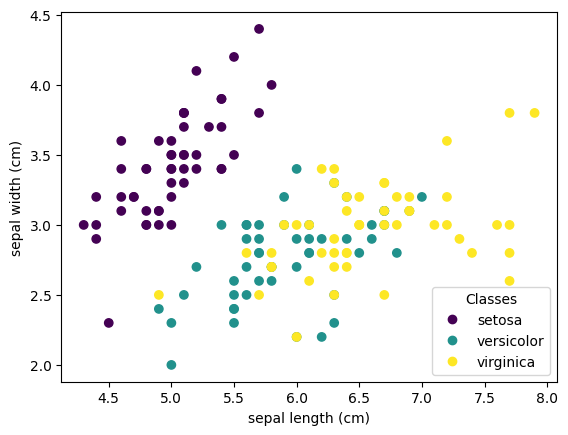

In [3]:
import matplotlib.pyplot as plt

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

In [4]:
import pandas as pd
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

print(iris_df.head(10))


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
5                5.4               3.9                1.7               0.4
6                4.6               3.4                1.4               0.3
7                5.0               3.4                1.5               0.2
8                4.4               2.9                1.4               0.2
9                4.9               3.1                1.5               0.1


In [5]:
from sklearn.model_selection import train_test_split
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 2.) Train a Decision Tree on the training set and evaluate it on the test set.
This means using the DecisionTreeClassifier from sklearn and training it on the training set and then evaluating it on the test set. Try some hyperparameter tuning and visualize the performance based on one of the hyperparameters. (size of the tree)

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_train, clf.predict(X_train)))


clf2 = DecisionTreeClassifier(max_depth=3)
clf2 = clf2.fit(X_train,y_train)
y_pred2 = clf2.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_train, clf2.predict(X_train)))

#clf2 = DecisionTreeClassifier(max_leaf_nodes=20) -- possible to tune by the leaf nodes amount etc 




Accuracy: 1.0
Accuracy: 0.9583333333333334


### 3.) Visualize the Decision Tree
use the `plot_tree` function from isklearn.tree` to visualize the decision tree.
Which attributes are the most important ones and used for the first splits?

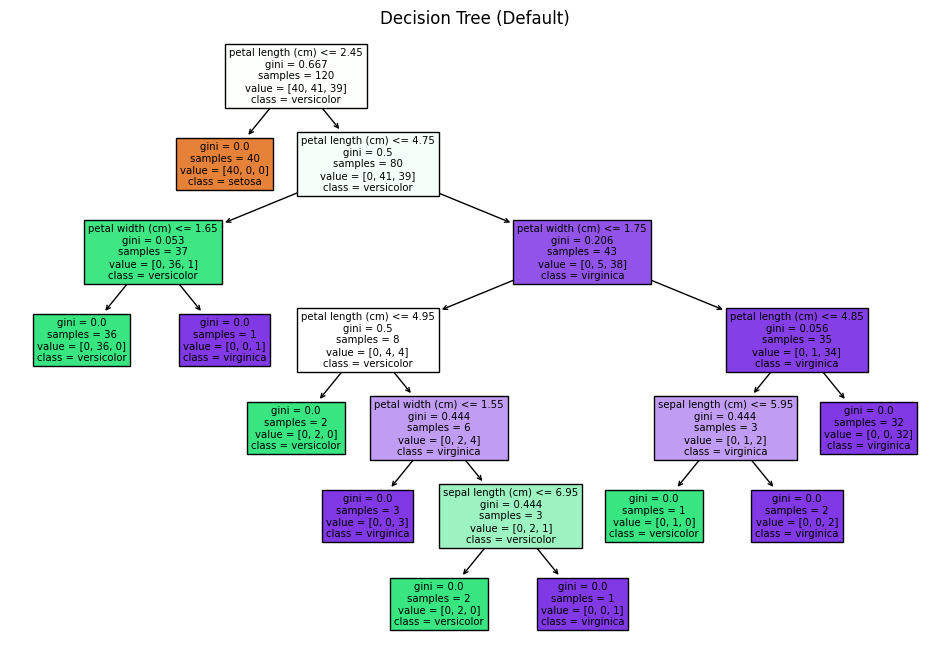

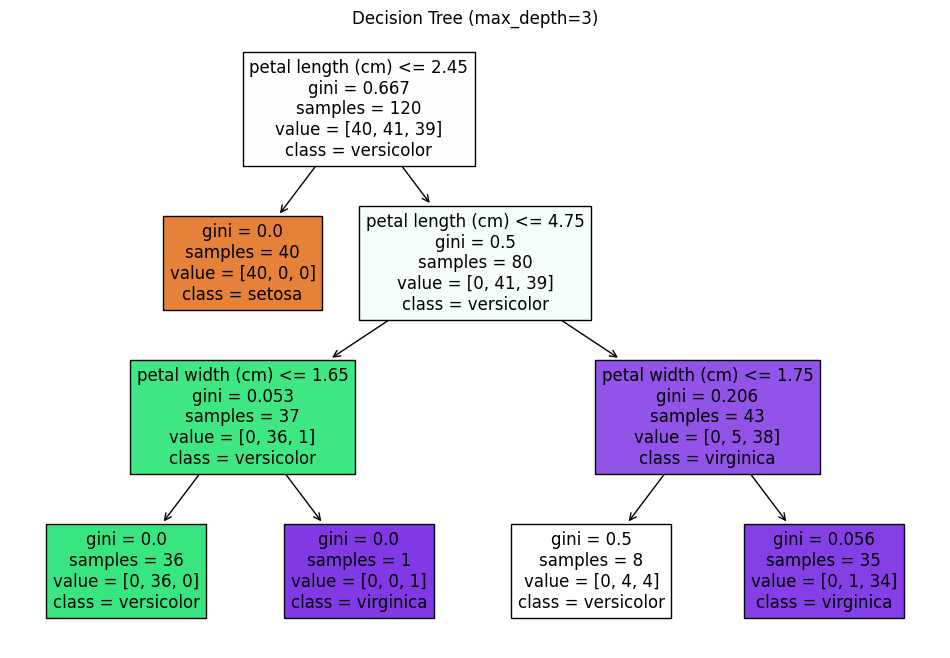

In [7]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Decision Tree (Default)")
plt.show()

plt.figure(figsize=(12, 8))
plot_tree(clf2, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Decision Tree (max_depth=3)")
plt.show()

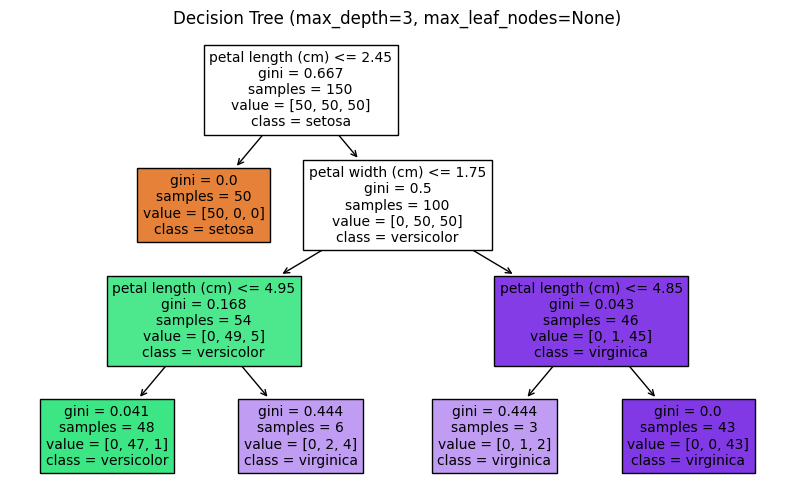

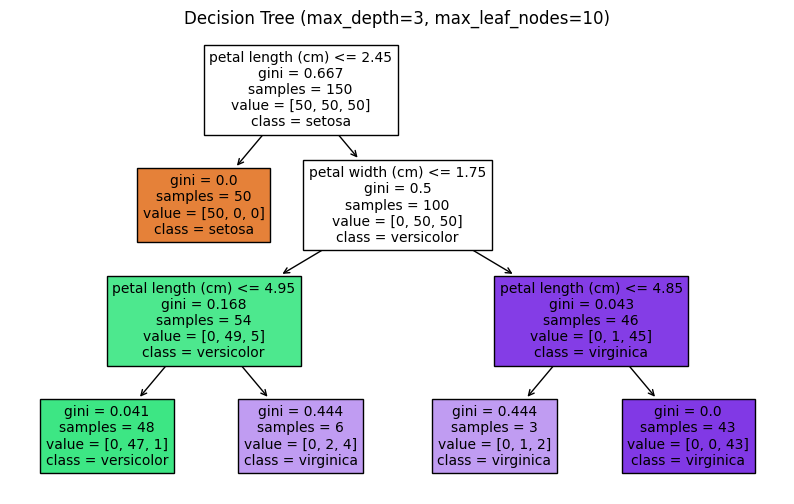

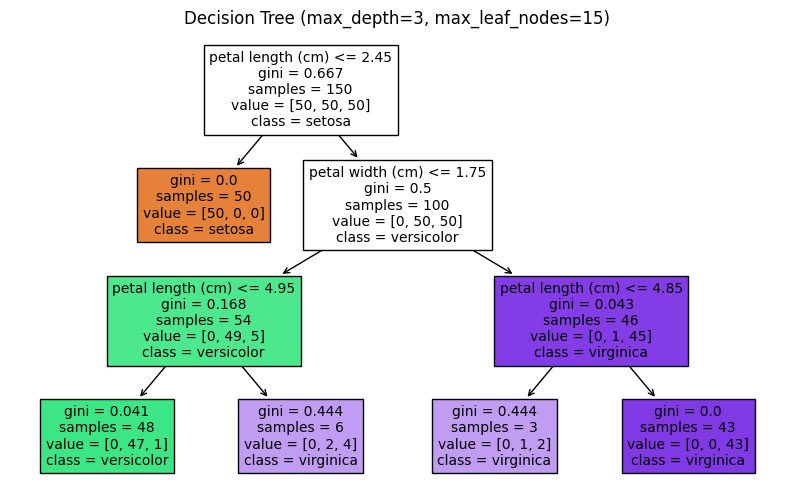

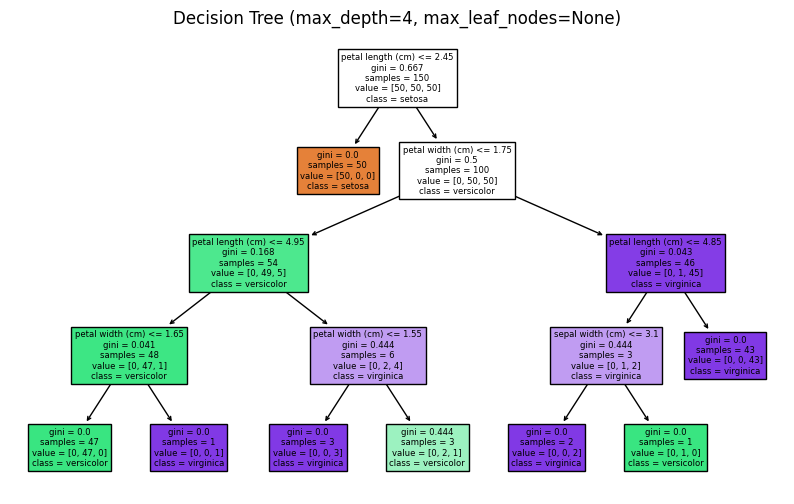

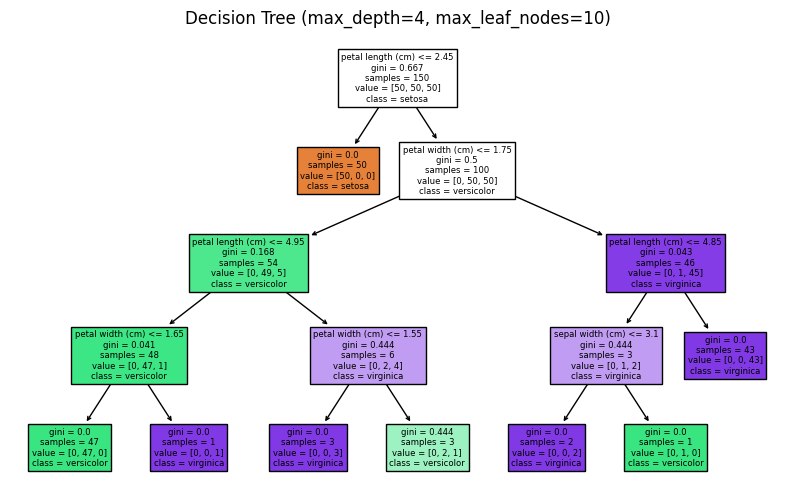

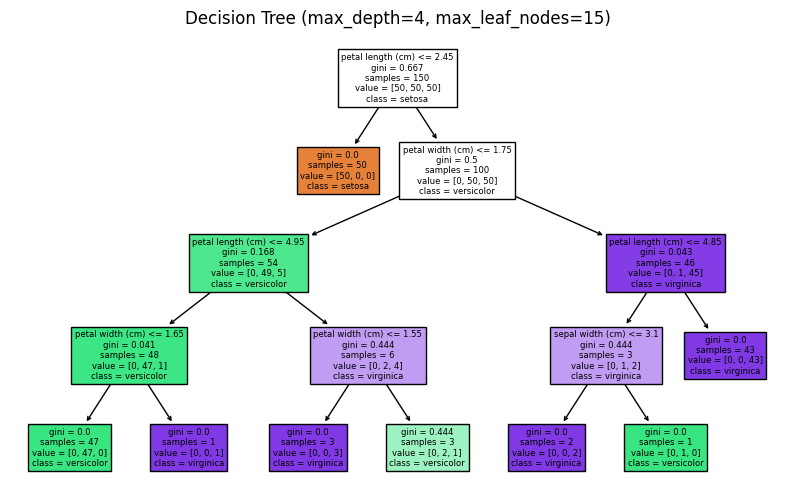

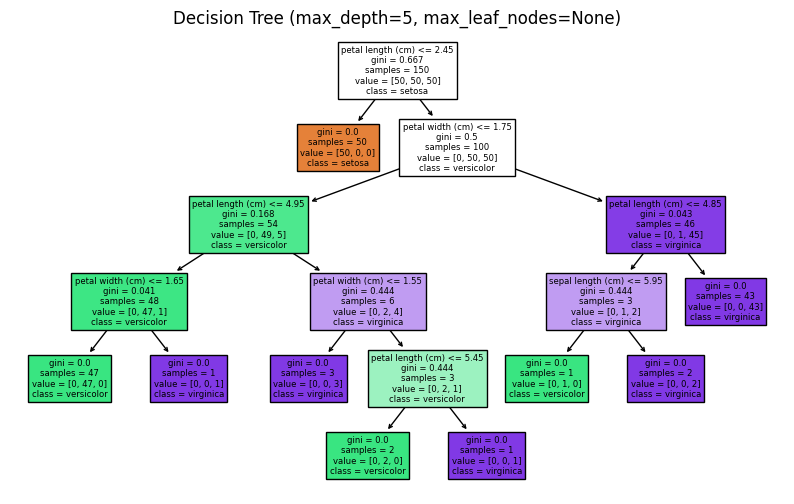

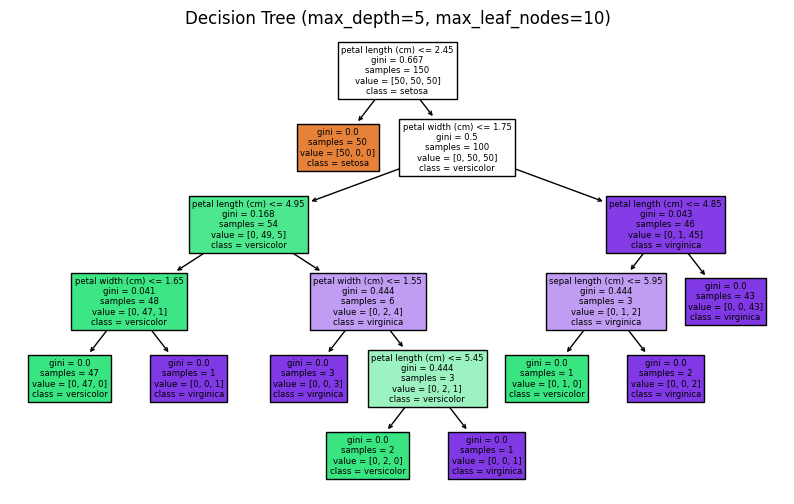

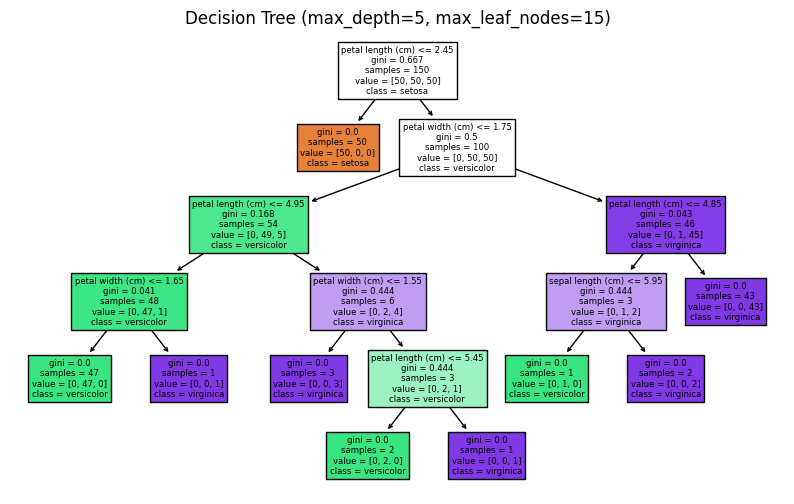

In [ ]:
#visualising the trees with diferent paramethers 

max_depths = [3, 4, 5]  # Example depths to iterate over
max_leaf_nodes_list = [None, 10, 15]  # Include None for no constraint

# Loop over different parameters and fit models
for max_depth in max_depths:
    for max_leaf_nodes in max_leaf_nodes_list:
        clf = DecisionTreeClassifier(max_depth=max_depth, max_leaf_nodes=max_leaf_nodes, random_state=42)
        clf.fit(X, y)
        
        plt.figure(figsize=(10, 6))
        plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
        plt.title(f"Decision Tree (max_depth={max_depth}, max_leaf_nodes={max_leaf_nodes})")
        plt.show()

### 4.) Optional: Implement the Decision Tree Algorithm from scratch

### Pseudo Code for the ID3 Algorithm
```
def ID3(D, A):
  if D is pure or A is empty:
    return a leaf node with the majority class in D
  else:
    A_best = argmax(InformationGain(D, A))
    root = Node(A_best)
    for v in values(A_best):
      D_v = subset(D, A_best, v)
      child = ID3(D_v, A - {A_best})
      root.add_child(v, child)
    return root
```

In [18]:
def calculate_entropy(data, target_column):
    pass

def calculate_information_gain(data, x, target_column):
    pass

def id3(data, target_column, features):
    if len(data[target_column].unique()) == 1:
        return data[target_column].iloc[0]

 
    if len(features) == 0:
        return data[target_column].mode().iloc[0]

    best_feature = max(features, key=lambda x: calculate_information_gain(data, x, target_column))

    tree = {best_feature: {}}

    features = [f for f in features if f != best_feature]

    for value in data[best_feature].unique():
        subset = data[data[best_feature] == value]
        tree[best_feature][value] = id3(subset, target_column, features)

    return tree